# Machine Learning
## Trabalho Prático I - Classificação binária: Exoplanetas
### Nome: Romeu Oliveira			Matrícula: 2012422971

## Introdução

#### O Problema  
A sonda _Kepler_ enviada pela NASA coletou informações e obteve um dataset composto por KOIs (Kepler Object of Interest), que são um conjunto de caracteríscas estimadas de corpos celestes. A NASA obtem o conhecimento de quais corpos celestes são ou não um exoplaneta. Neste trabalho prático serão comparados diferentes métodos para resolver o problema de classificação binária que decidirá, a partir de um KOI, se este corpo celeste é ou não um exoplaneta.

## Resumo dos dados e análise exploratória
Primeiramente, vamos visualizar algumas informações sobre o dataset: 

In [17]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display

from sklearn import feature_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Constantes
INPUT_FILEPATH = 'koi_data.csv'
TARGET = 'koi_disposition'
VAL_SIZE = .3
N_FEATURES = 40


In [3]:

df = pd.read_csv(INPUT_FILEPATH)
display(df.head(10))

print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[1])
print('Dados faltando: ', df.isnull().sum().sum())


,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.4300,0.9400,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.6300,1.2300,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.1110,0.0020,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.0100,0.2300,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.4500,24.0900,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
5,K00757.01,CONFIRMED,16.06865,0.052,3.53470,4914.3,0.06216,3.66590,5.76,0.1158,...,0.0330,-0.0440,0.00026,0.00049,0.041,-0.015,0.044,0.005,0.030,0.031
6,K00001.01,CONFIRMED,2.47061,0.818,1.74319,14231.0,0.12387,1.83538,13.04,0.0354,...,-0.0232,0.1066,-0.00012,0.00078,-0.009,-0.300,0.300,0.015,-0.270,0.270
7,K00010.01,CONFIRMED,3.52250,0.631,3.19843,9145.7,0.09209,0.65374,14.59,0.0473,...,-0.5515,-0.0597,0.00001,0.00036,0.014,-0.013,0.020,-0.028,0.176,0.178
8,K00112.02,CONFIRMED,3.70921,0.051,2.63020,131.1,0.01042,1.77451,1.16,0.0465,...,0.3600,0.4500,-0.00005,-0.00005,0.240,-0.150,0.290,0.160,-0.130,0.210
9,K00742.01,FALSE POSITIVE,11.52145,2.483,3.63990,17984.0,1.62536,1.27376,150.51,0.0978,...,0.0680,-0.0380,0.00000,0.00010,0.009,-0.009,0.013,0.147,0.037,0.151


Linhas:  5202
Colunas:  43
Dados faltando:  0


Como não temos dados faltando não realizaremos tratamento para remover 
colunas ou linhas que representem incertezas quanto as informações do dataset. 

### Target e features:


In [4]:
print('TARGET: ', '\t' + TARGET)
print('\nFEATURE\t\t     TYPE')
df_f = df.drop(['kepoi_name', TARGET], axis=1)
display(df_f.dtypes)


TARGET:  	koi_disposition

FEATURE		     TYPE


koi_period          float64
koi_impact          float64
koi_duration        float64
koi_depth           float64
koi_ror             float64
koi_srho            float64
koi_prad            float64
koi_sma             float64
koi_incl            float64
koi_teq             float64
koi_insol           float64
koi_dor             float64
koi_max_sngle_ev    float64
koi_max_mult_ev     float64
koi_model_snr       float64
koi_steff           float64
koi_slogg           float64
koi_smet            float64
koi_srad            float64
koi_smass           float64
koi_kepmag          float64
koi_gmag            float64
koi_rmag            float64
koi_imag            float64
koi_zmag            float64
koi_jmag            float64
koi_hmag            float64
koi_kmag            float64
koi_fwm_stat_sig    float64
koi_fwm_sra         float64
koi_fwm_sdec        float64
koi_fwm_srao        float64
koi_fwm_sdeco       float64
koi_fwm_prao        float64
koi_fwm_pdeco       float64
koi_dicco_mra       

Notamos que não existem features categóricas, apenas numéricas.  
## Preprocessamento
### Normalização
Antes de normalizar precisamos verificar se o menor valor para o 
desvio padrão não é muito próximo de 0: 


In [5]:
assert min(df_f.std()) > 0.0001

E então normalizamos:


In [6]:
df_f = (df_f - df_f.mean()) / df_f.std()


### Separando treino e validação


In [7]:
# Seleção de features
features = list(df_f.columns)
skb = feature_selection.SelectKBest(feature_selection.f_classif, N_FEATURES)
skb = skb.fit(df_f, df[TARGET])

# Separando treino e validação
idx = list(df.index)
np.random.shuffle(idx)
train_idx = idx[int(VAL_SIZE*len(idx)):]
val_idx = idx[:int(VAL_SIZE*len(idx))]
x_train = skb.transform(df.loc[train_idx, features])
x_val = skb.transform(df.loc[val_idx, features])
y_train = df.loc[train_idx, TARGET]
y_val = df.loc[val_idx, TARGET]


## Classificação


In [8]:
def printAcc(tr, val):
	print('Acuracia no treino: ',round(tr, 3), '\nAcuracia na validação: ', round(val, 3))

def plot(x, title, model, x_label):
	fig, ax = plt.subplots()
	plt.xlabel(x_label, fontsize=16)
	plt.ylabel('Accuracy', fontsize=16)
	l1 = plt.plot(x,model(x)[0], label='Training')
	l2 = plt.plot(x,model(x)[1], label='Validation')
	if title == 'Decision Tree':
		plt.scatter(0, decision_tree()[0], label='Training_inf')
		plt.scatter(0, decision_tree()[1], label='Validation_inf')
		ax.annotate(decision_tree()[0], (0, decision_tree()[0]))
		ax.annotate(round(decision_tree()[1], 3), (0, decision_tree()[1]))
	plt.setp(l1, linewidth=1, color='b', linestyle='-')
	plt.setp(l2, linewidth=1, color='g', linestyle='-')
	fig.suptitle(title, fontsize=20)
	plt.legend()
	plt.draw()

def plot_roc(roc_data):
	plt.figure(figsize=(7, 7))
	lw = 2
	
	plt.plot(roc_data[0], roc_data[1], lw=2)
	plt.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	plt.xlabel('FALSE POSITIVE')
	plt.ylabel('CONFIRMED')
	plt.title('ROC Curve')
	plt.show()


### Gaussian Naive Bayes


In [35]:
def g_naive_bayes():
	gnb = GaussianNB().fit(X=x_train, y=y_train)
	tr_acc = gnb.score(x_train, y_train)
	val_acc = gnb.score(x_val, y_val)
	y_pred = gnb.predict(x_val)
	# print([value for value in y_val if value != 'CONFIRMED' and value !='FALSE POSITIVE'])
	# print([value for value in y_pred if value != 'CONFIRMED' and value !='FALSE POSITIVE'])
	y_prob = gnb.predict_proba(x_val)[:, 1]
	classes = ['FALSE POSITIVE', 'CONFIRMED']
	printAcc(tr_acc, val_acc)
	print('Métricas de precisão e revogação:\n')
	print(metrics.classification_report(y_val, y_pred))
g_naive_bayes()


Acuracia no treino:  0.81 
Acuracia na validação:  0.801
Métricas de precisão e revogação:

                precision    recall  f1-score   support

     CONFIRMED       0.68      0.97      0.80       641
FALSE POSITIVE       0.97      0.68      0.80       919

     micro avg       0.80      0.80      0.80      1560
     macro avg       0.83      0.83      0.80      1560
  weighted avg       0.85      0.80      0.80      1560



### Decision Tree


In [10]:
@np.vectorize
def decision_tree(height=None):
	dt = DecisionTreeClassifier(max_depth=height).fit(X=x_train, y=y_train)
	tr_acc = dt.score(x_train, y_train)
	val_acc = dt.score(x_val, y_val)
	# printAcc(tr_acc, val_acc)
	return tr_acc, val_acc

# h = np.arange(1, 25, 1)
# plot(x=h, title='Decision Tree', x_label='Height', model=decision_tree)


### SVM


In [11]:
def svm(kernel):
	# Aqui, como sugere a documentação setamos o parametro dual = False
	# para resolver o problema primal, pois o número de samples > número de features
	svc = LinearSVC(dual=False).fit(X=x_train, y=y_train)
	if kernel != 'linear':
		svc = SVC(C=.1, gamma='scale', kernel=kernel).fit(X=x_train, y=y_train)
	tr_acc = svc.score(x_train, y_train)
	val_acc = svc.score(x_val, y_val)
	printAcc(tr_acc, val_acc)


#### Linear


In [29]:
svm('linear')


Acuracia no treino:  0.934 
Acuracia na validação:  0.928


#### Sigmoid


In [43]:
svm('sigmoid')


Acuracia no treino:  0.616 
Acuracia na validação:  0.601


#### Polynomial


In [44]:
svm('poly')


Acuracia no treino:  0.596 
Acuracia na validação:  0.596


#### RBF


In [45]:
svm('rbf')


Acuracia no treino:  0.596 
Acuracia na validação:  0.596


### K-NN


In [12]:
@np.vectorize
def knn(k):
	knn = KNeighborsClassifier(n_neighbors=k).fit(X=x_train, y=y_train)
	tr_acc = knn.score(x_train, y_train)
	val_acc = knn.score(x_val, y_val)
	# printAcc(tr_acc, val_acc)
	return tr_acc, val_acc

# neighbors = np.arange(1, 25, 1)
# plot(x=neighbors, title='K-NN', x_label='Neighbors', model=knn)


### Random Forest


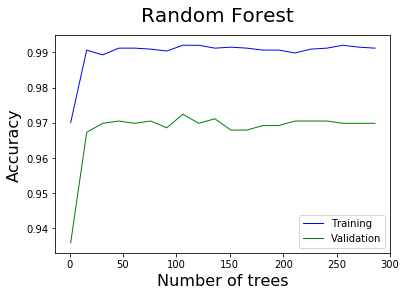

In [13]:
@np.vectorize
def random_forest(N):
	rf = RandomForestClassifier(n_estimators=N, max_depth=10).fit(X=x_train, y=y_train)
	tr_acc = rf.score(x_train, y_train)
	val_acc = rf.score(x_val, y_val)
	# printAcc(tr_acc, val_acc)
	return tr_acc, val_acc

N = np.arange(1, 300, 15)
plot(x=N, title='Random Forest', x_label='Number of trees', model=random_forest)


### Gradient Tree Boosting


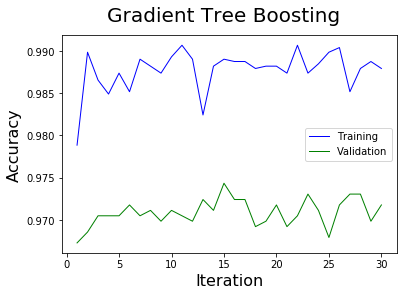

In [16]:
@np.vectorize
def gt_boosting(n):
	gtb = GradientBoostingClassifier(n_iter_no_change=n).fit(X=x_train, y=y_train)
	tr_acc = gtb.score(x_train, y_train)
	val_acc = gtb.score(x_val, y_val)
	# printAcc(tr_acc, val_acc)
	return tr_acc, val_acc

N = np.arange(1, 31, 1)
plot(x=N, title='Gradient Tree Boosting', x_label='Number of Iterations', model=gt_boosting)
